In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-sales/Ecommerce_Sales_Data_2024_2025.csv


## Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## load e-commerce sales dataset

In [3]:
df=pd.read_csv('/kaggle/input/e-commerce-sales/Ecommerce_Sales_Data_2024_2025.csv')
df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


## Basic Data Exploration

In [4]:
#BASIC DATA EXPLORATION
print("="*50)
print("1. BASIC DATA EXPLORATION")
print("="*50)

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:")
print(f"Duplicate rows: {df.duplicated().sum()}")

1. BASIC DATA EXPLORATION

First 5 rows:
   Order ID  Order Date Customer Name Region       City   Category  \
0     10001  2024-10-19  Kashvi Varty  South  Bangalore      Books   
1     10002  2025-08-30   Advik Desai  North      Delhi  Groceries   
2     10003  2023-11-04    Rhea Kalla   East      Patna    Kitchen   
3     10004  2025-05-23     Anika Sen   East    Kolkata  Groceries   
4     10005  2025-01-19   Akarsh Kaul   West       Pune   Clothing   

  Sub-Category       Product Name  Quantity  Unit Price  Discount     Sales  \
0  Non-Fiction  Non-Fiction Ipsum         2       36294         5   68958.6   
1         Rice          Rice Nemo         1       42165        20   33732.0   
2       Juicer        Juicer Odio         4       64876        20  207603.2   
3          Oil      Oil Doloribus         5       37320        15  158610.0   
4    Kids Wear      Kids Wear Quo         1       50037        10   45033.3   

     Profit Payment Mode  
0  10525.09   Debit Card  
1   6299.

## Check Data Quality

In [5]:
#DATA QUALITY CHECK
print("\n" + "="*50)
print("2. DATA QUALITY CHECK")
print("="*50)

print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\nCheck for Data Consistency:")
print("Order IDs unique:", df['Order ID'].is_unique)
print("Date range:", df['Order Date'].min(), "to", df['Order Date'].max())


2. DATA QUALITY CHECK

Unique Values per Column:
Order ID: 5000 unique values
Order Date: 730 unique values
Customer Name: 4844 unique values
Region: 4 unique values
City: 20 unique values
Category: 10 unique values
Sub-Category: 50 unique values
Product Name: 3835 unique values
Quantity: 5 unique values
Unit Price: 4841 unique values
Discount: 5 unique values
Sales: 4978 unique values
Profit: 4996 unique values
Payment Mode: 5 unique values

Check for Data Consistency:
Order IDs unique: True
Date range: 2023-10-04 to 2025-10-03


## Univariate data analysis

In [6]:
#UNIVARIATE ANALYSIS
print("\n" + "="*50)
print("3. UNIVARIATE ANALYSIS")
print("="*50)



3. UNIVARIATE ANALYSIS


In [7]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
# Numerical columns analysis
numerical_cols = ['Quantity', 'Unit Price', 'Discount', 'Sales', 'Profit']
print("\nNumerical Variables Analysis:")
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Range: {df[col].max() - df[col].min():.2f}")


Numerical Variables Analysis:

Quantity:
  Mean: 2.99
  Median: 3.00
  Std: 1.41
  Min: 1.00
  Max: 5.00
  Range: 4.00

Unit Price:
  Mean: 39760.90
  Median: 39459.50
  Std: 22831.78
  Min: 222.00
  Max: 79998.00
  Range: 79776.00

Discount:
  Mean: 10.05
  Median: 10.00
  Std: 7.08
  Min: 0.00
  Max: 20.00
  Range: 20.00

Sales:
  Mean: 106733.20
  Median: 83080.32
  Std: 85108.21
  Min: 264.10
  Max: 398485.00
  Range: 398220.90

Profit:
  Mean: 15941.75
  Median: 11108.53
  Std: 14897.68
  Min: 19.12
  Max: 89688.44
  Range: 89669.32


## Categorical varables analysis

In [9]:
 #CATEGORICAL VARIABLES ANALYSIS
print("\n" + "="*50)
print("4. CATEGORICAL VARIABLES ANALYSIS")
print("="*50)

categorical_cols = ['Region', 'City', 'Category', 'Sub-Category', 'Payment Mode']

for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())


4. CATEGORICAL VARIABLES ANALYSIS

Region Distribution:
Region
North    1288
East     1256
West     1241
South    1215
Name: count, dtype: int64

City Distribution:
City
Guwahati              293
Chandigarh            276
Lucknow               261
Surat                 261
Jaipur                261
Bangalore             261
Goa                   259
Patna                 258
Chennai               252
Bhubaneswar           249
Amritsar              248
Coimbatore            245
Delhi                 242
Ahmedabad             241
Mumbai                240
Pune                  240
Ranchi                233
Hyderabad             232
Thiruvananthapuram    225
Kolkata               223
Name: count, dtype: int64

Category Distribution:
Category
Books          528
Kitchen        528
Furniture      527
Home Decor     515
Clothing       511
Sports         511
Toys           478
Electronics    472
Groceries      470
Beauty         460
Name: count, dtype: int64

Sub-Category Distribution:
Sub-Ca

## Bivariate data Analysis

In [10]:
 #BIVARIATE ANALYSIS
print("\n" + "="*50)
print("5. BIVARIATE ANALYSIS")
print("="*50)


5. BIVARIATE ANALYSIS


In [11]:
# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)



Correlation Matrix:
            Quantity  Unit Price  Discount     Sales    Profit
Quantity    1.000000   -0.010982 -0.007955  0.588705  0.502701
Unit Price -0.010982    1.000000  0.000475  0.715123  0.606293
Discount   -0.007955    0.000475  1.000000 -0.101611 -0.088516
Sales       0.588705    0.715123 -0.101611  1.000000  0.848792
Profit      0.502701    0.606293 -0.088516  0.848792  1.000000


In [12]:
# Sales vs Profit analysis
print(f"\nSales-Profit Correlation: {df['Sales'].corr(df['Profit']):.3f}")


Sales-Profit Correlation: 0.849


In [13]:
# Discount impact analysis
print(f"\nDiscount-Sales Correlation: {df['Discount'].corr(df['Sales']):.3f}")
print(f"Discount-Profit Correlation: {df['Discount'].corr(df['Profit']):.3f}")


Discount-Sales Correlation: -0.102
Discount-Profit Correlation: -0.089


## Advanced Data Analysis

In [14]:
 #ADVANCED ANALYSIS
print("\n" + "="*50)
print("6. ADVANCED ANALYSIS")
print("="*50)

# Profitability Analysis
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
df['Discount_Rate'] = df['Discount']

print("\nProfitability Analysis:")
print(f"Average Profit Margin: {df['Profit_Margin'].mean():.2f}%")
print(f"Highest Profit Margin: {df['Profit_Margin'].max():.2f}%")
print(f"Lowest Profit Margin: {df['Profit_Margin'].min():.2f}%")

# Customer Value Analysis
customer_stats = df.groupby('Customer Name').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)
print("\nCustomer Value Analysis:")
print(customer_stats)


6. ADVANCED ANALYSIS

Profitability Analysis:
Average Profit Margin: 14.92%
Highest Profit Margin: 25.00%
Lowest Profit Margin: 5.00%

Customer Value Analysis:
                           Sales                     Profit           Quantity
                             sum       mean count       sum      mean      sum
Customer Name                                                                 
Aaina Balasubramanian  158876.80  158876.80     1  23210.84  23210.84        4
Aaina Bhargava          26411.90   26411.90     1   3768.47   3768.47        2
Aaina Bir              231044.00  231044.00     1  57568.32  57568.32        5
Aaina Chander          350240.00  350240.00     1  31237.23  31237.23        5
Aaina Chandran          43747.50   43747.50     1   8556.76   8556.76        3
...                          ...        ...   ...       ...       ...      ...
Zoya Loyal             237588.00  237588.00     1  51359.05  51359.05        3
Zoya Ranganathan        65364.30   65364.30     1

## Temporal Data Analysis

In [15]:
#TEMPORAL ANALYSIS
print("\n" + "="*50)
print("7. TEMPORAL ANALYSIS")
print("="*50)

# Extract time-based features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Quarter'] = df['Order Date'].dt.quarter

print("\nTemporal Distribution:")
print("Orders by Year:")
print(df['Order_Year'].value_counts().sort_index())
print("\nOrders by Month:")
print(df['Order_Month'].value_counts().sort_index())
print("\nOrders by Quarter:")
print(df['Order_Quarter'].value_counts().sort_index())


7. TEMPORAL ANALYSIS

Temporal Distribution:
Orders by Year:
Order_Year
2023     601
2024    2532
2025    1867
Name: count, dtype: int64

Orders by Month:
Order_Month
1     442
2     374
3     428
4     414
5     451
6     404
7     407
8     443
9     393
10    438
11    392
12    414
Name: count, dtype: int64

Orders by Quarter:
Order_Quarter
1    1244
2    1269
3    1243
4    1244
Name: count, dtype: int64


## Regional and Category Analysis

In [16]:
#REGIONAL AND CATEGORY ANALYSIS
print("\n" + "="*50)
print("8. REGIONAL AND CATEGORY ANALYSIS")
print("="*50)

# Regional Performance
regional_stats = df.groupby('Region').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Profit_Margin': 'mean'
}).round(2)
print("Regional Performance:")
print(regional_stats)

# Category Performance
category_stats = df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Profit_Margin': 'mean'
}).round(2)
print("\nCategory Performance:")
print(category_stats)


8. REGIONAL AND CATEGORY ANALYSIS
Regional Performance:
               Sales                        Profit           Profit_Margin
                 sum       mean count          sum      mean          mean
Region                                                                    
East    1.358116e+08  108130.28  1256  20532558.12  16347.58         14.91
North   1.435782e+08  111473.79  1288  21343004.33  16570.66         14.84
South   1.232302e+08  101424.01  1215  18253049.32  15023.09         14.98
West    1.310460e+08  105597.08  1241  19580123.14  15777.70         14.97

Category Performance:
                   Sales                       Profit           Profit_Margin
                     sum       mean count         sum      mean          mean
Category                                                                     
Beauty       50803409.70  110442.20   460  7213436.07  15681.38         14.38
Books        54932643.00  104039.10   528  8076273.29  15295.97         14.66
Cloth

## Paymant Mode Analysis

In [17]:
#PAYMENT MODE ANALYSIS
print("\n" + "="*50)
print("9. PAYMENT MODE ANALYSIS")
print("="*50)

payment_stats = df.groupby('Payment Mode').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Profit_Margin': 'mean'
}).round(2)
print("Payment Mode Performance:")
print(payment_stats)


9. PAYMENT MODE ANALYSIS
Payment Mode Performance:
                     Sales                        Profit            \
                       sum       mean count          sum      mean   
Payment Mode                                                         
COD           1.088814e+08  108339.70  1005  16575845.53  16493.38   
Credit Card   1.060271e+08  106667.15   994  15658639.35  15753.16   
Debit Card    1.053464e+08  105031.29  1003  15479323.07  15433.02   
Net Banking   1.114655e+08  110361.90  1010  16964119.74  16796.16   
UPI           1.019456e+08  103183.79   988  15030807.22  15213.37   

             Profit_Margin  
                      mean  
Payment Mode                
COD                  15.07  
Credit Card          14.88  
Debit Card           14.88  
Net Banking          14.92  
UPI                  14.87  


In [18]:
print("10. OUTLIER DETECTION")
print("="*50)

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

print("Outliers in Numerical Columns:")
for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers - {outliers.tolist()}")

10. OUTLIER DETECTION
Outliers in Numerical Columns:
Quantity: 0 outliers - []
Unit Price: 0 outliers - []
Discount: 0 outliers - []
Sales: 75 outliers - [337675.25, 342567.0, 333535.5, 352555.0, 353172.0, 343040.0, 340765.0, 335565.0, 358200.0, 348222.5, 370956.0, 345000.0, 335135.0, 352051.0, 391910.0, 382185.0, 372713.5, 373500.0, 342335.0, 338219.0, 344245.5, 333200.0, 373455.0, 338545.0, 373915.0, 338810.0, 345415.5, 344702.75, 358385.0, 337454.25, 335573.25, 379965.0, 348970.0, 377297.25, 343966.5, 359460.0, 368942.0, 341830.0, 339844.5, 372330.0, 377080.0, 337581.75, 338971.5, 361695.0, 341534.5, 333738.0, 338376.5, 349832.75, 374035.0, 393580.0, 398485.0, 347787.0, 377387.5, 334107.0, 336306.75, 380045.0, 352179.25, 376725.0, 342040.0, 343630.0, 338067.0, 336766.5, 355720.0, 339824.5, 342166.5, 355216.5, 358938.5, 348650.0, 368275.0, 370685.0, 348355.0, 367179.75, 354706.25, 334979.5, 350240.0]
Profit: 223 outliers - [80309.87, 61655.17, 51927.61, 56964.33, 50743.1, 52730.72, 5

## Data Visualization process


11. DATA VISUALIZATION


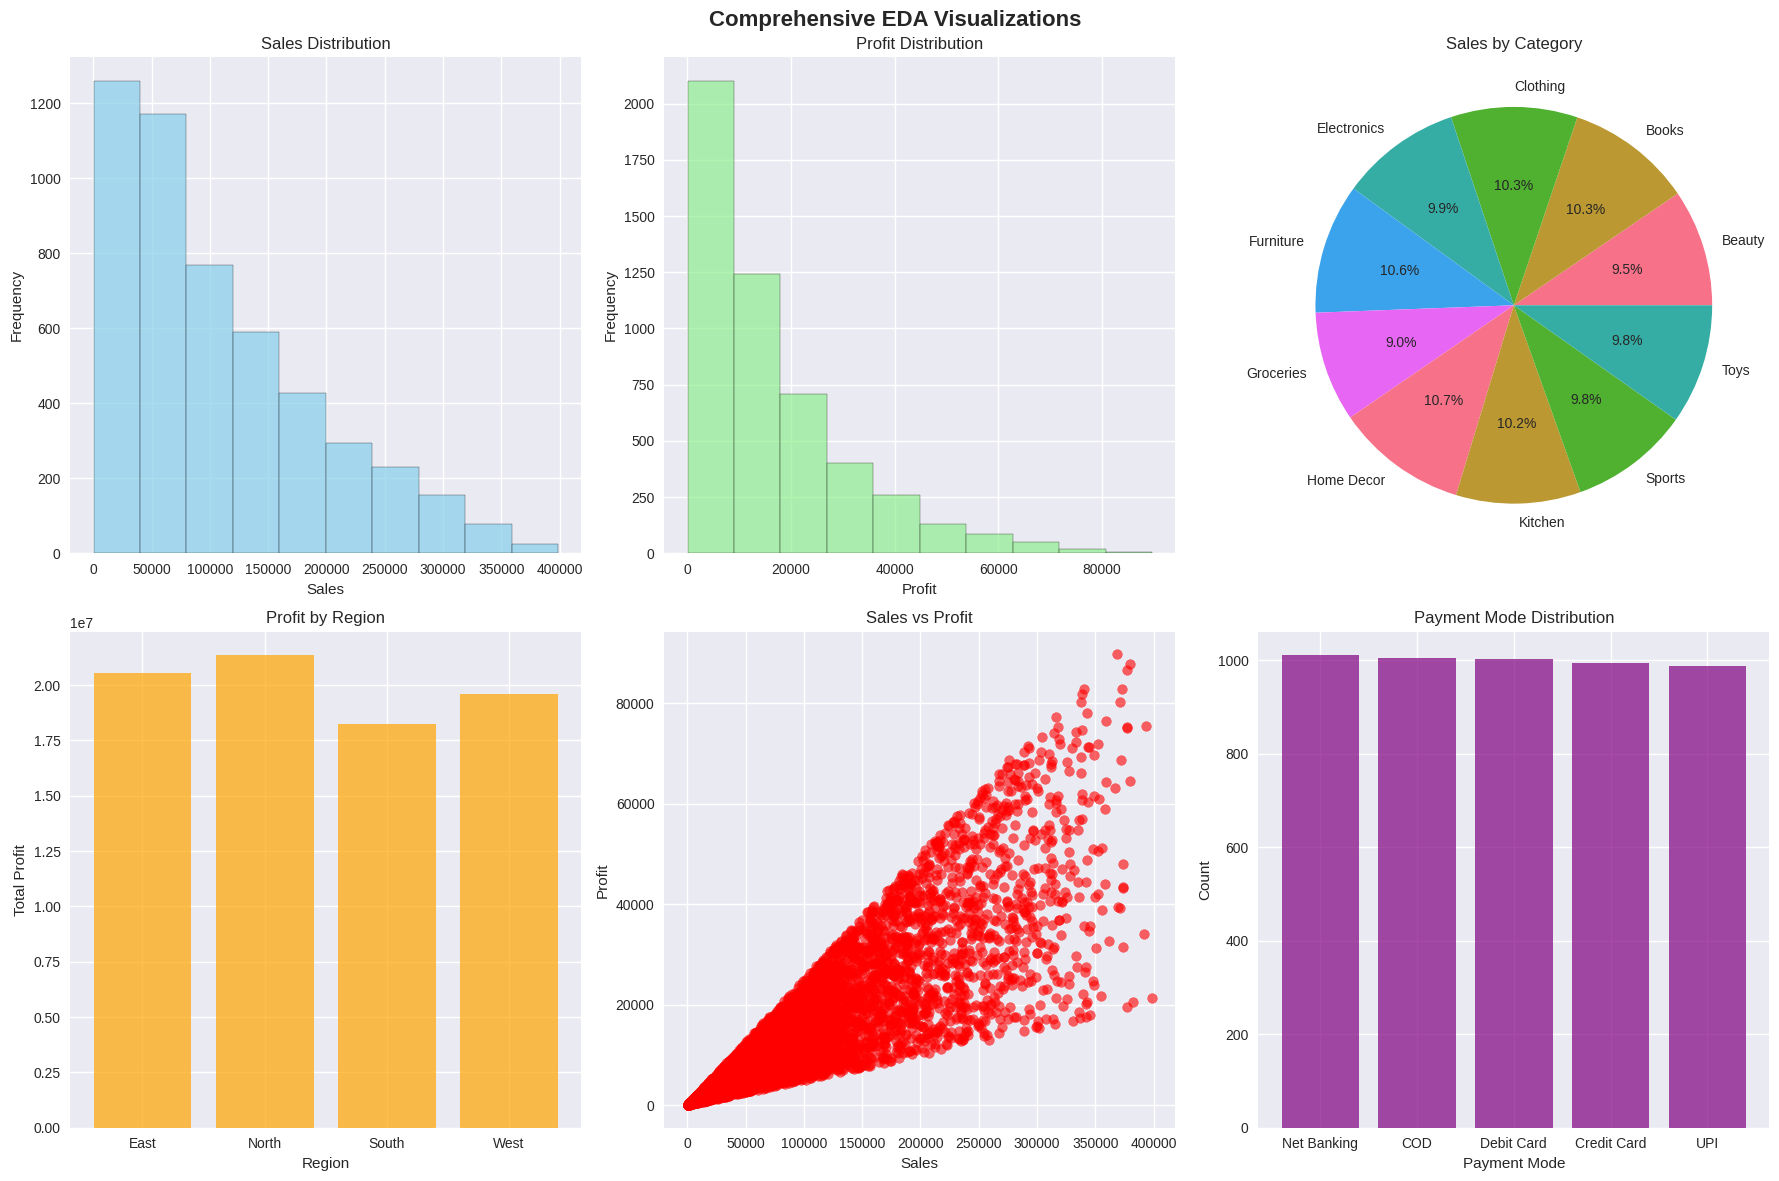

In [19]:
#VISUALIZATION SECTION
print("\n" + "="*50)
print("11. DATA VISUALIZATION")
print("="*50)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive EDA Visualizations', fontsize=16, fontweight='bold')

# 1. Sales Distribution
axes[0,0].hist(df['Sales'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Sales Distribution')
axes[0,0].set_xlabel('Sales')
axes[0,0].set_ylabel('Frequency')
# 2. Profit Distribution
axes[0,1].hist(df['Profit'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Profit Distribution')
axes[0,1].set_xlabel('Profit')
axes[0,1].set_ylabel('Frequency')

# 3. Category-wise Sales
category_sales = df.groupby('Category')['Sales'].sum()
axes[0,2].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%')
axes[0,2].set_title('Sales by Category')

# 4. Region-wise Performance
region_profit = df.groupby('Region')['Profit'].sum()
axes[1,0].bar(region_profit.index, region_profit.values, color='orange', alpha=0.7)
axes[1,0].set_title('Profit by Region')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Total Profit')

# 5. Sales vs Profit Scatter
axes[1,1].scatter(df['Sales'], df['Profit'], alpha=0.6, color='red')
axes[1,1].set_title('Sales vs Profit')
axes[1,1].set_xlabel('Sales')
axes[1,1].set_ylabel('Profit')

# 6. Payment Mode Distribution
payment_counts = df['Payment Mode'].value_counts()
axes[1,2].bar(payment_counts.index, payment_counts.values, color='purple', alpha=0.7)
axes[1,2].set_title('Payment Mode Distribution')
axes[1,2].set_xlabel('Payment Mode')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()


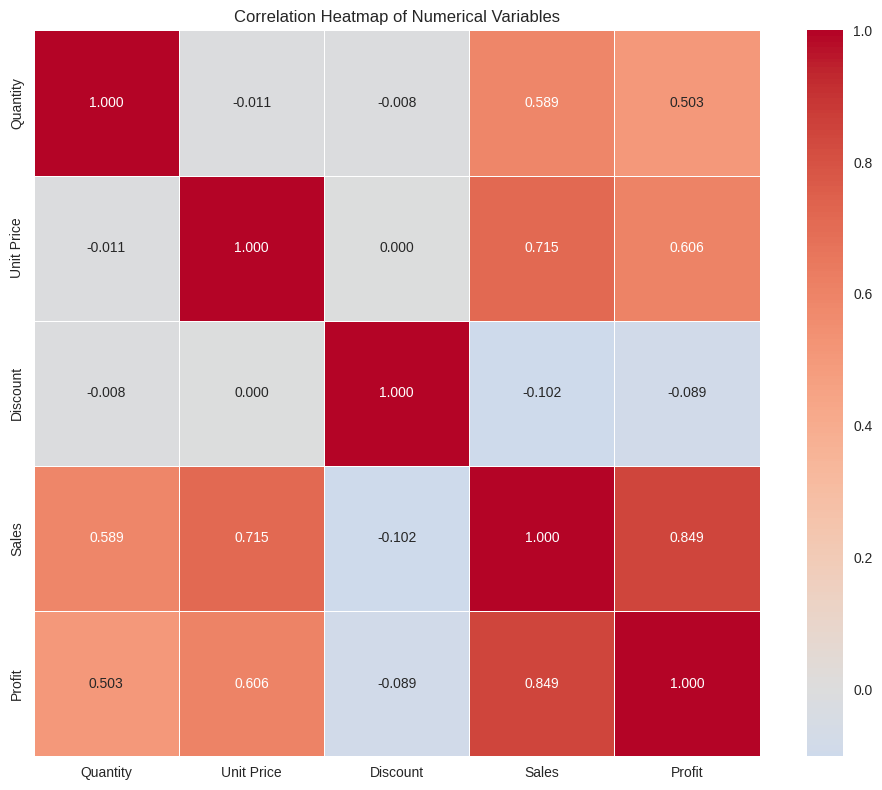

In [20]:
#CORRELATION HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

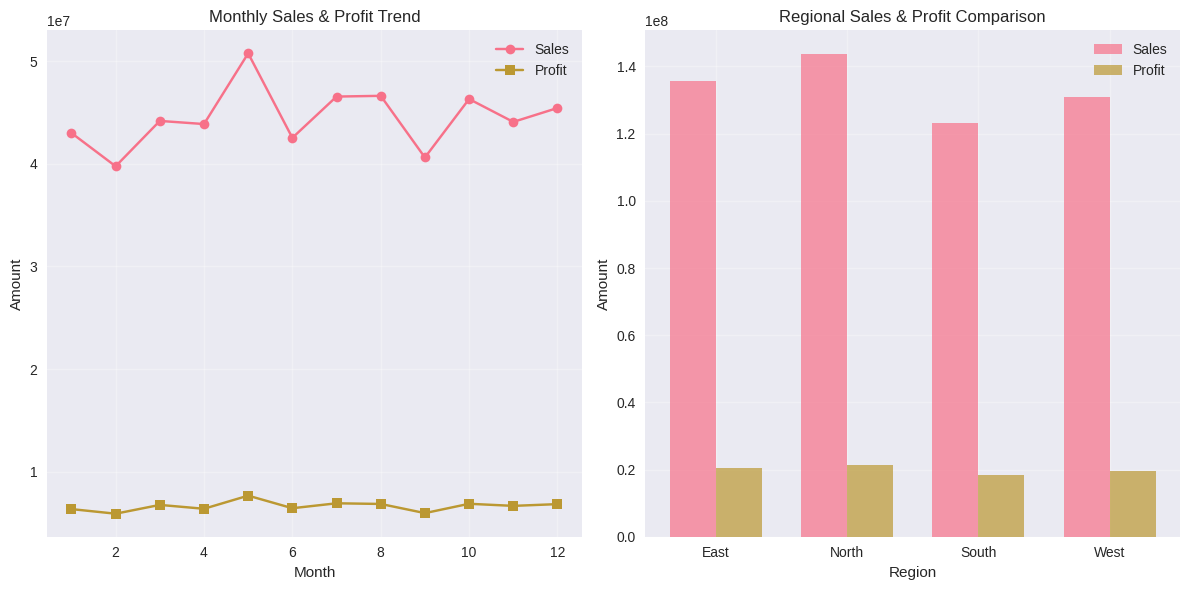

In [21]:
#TREND ANALYSIS
plt.figure(figsize=(12, 6))

# Monthly trend
monthly_trend = df.groupby('Order_Month').agg({'Sales': 'sum', 'Profit': 'sum'})
plt.subplot(1, 2, 1)
plt.plot(monthly_trend.index, monthly_trend['Sales'], marker='o', label='Sales')
plt.plot(monthly_trend.index, monthly_trend['Profit'], marker='s', label='Profit')
plt.title('Monthly Sales & Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True, alpha=0.3)

# Regional trend
regional_trend = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'})
plt.subplot(1, 2, 2)
x = np.arange(len(regional_trend.index))
width = 0.35
plt.bar(x - width/2, regional_trend['Sales'], width, label='Sales', alpha=0.7)
plt.bar(x + width/2, regional_trend['Profit'], width, label='Profit', alpha=0.7)
plt.title('Regional Sales & Profit Comparison')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(x, regional_trend.index)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Important keymetrics and Insights of Data

In [22]:
# 14. KEY METRICS AND INSIGHTS
print("\n" + "="*50)
print("14. KEY METRICS AND INSIGHTS")
print("="*50)

print(f"TOTAL BUSINESS METRICS:")
print(f"   • Total Sales: ₹{df['Sales'].sum():,.2f}")
print(f"   • Total Profit: ₹{df['Profit'].sum():,.2f}")
print(f"   • Average Profit Margin: {df['Profit_Margin'].mean():.2f}%")
print(f"   • Total Orders: {len(df)}")
print(f"   • Average Order Value: ₹{df['Sales'].mean():,.2f}")

print(f"\n TOP PERFORMERS:")
print(f"   • Highest Sales: ₹{df['Sales'].max():,.2f} (Order {df.loc[df['Sales'].idxmax(), 'Order ID']})")
print(f"   • Highest Profit: ₹{df['Profit'].max():,.2f} (Order {df.loc[df['Profit'].idxmax(), 'Order ID']})")
print(f"   • Best Profit Margin: {df['Profit_Margin'].max():.2f}%")

print(f"\nREGIONAL INSIGHTS:")
region_summary = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'})
best_region = region_summary['Profit'].idxmax()
print(f"   • Most Profitable Region: {best_region} (₹{region_summary.loc[best_region, 'Profit']:,.2f})")

print(f"\nCATEGORY INSIGHTS:")
category_summary = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})
best_category = category_summary['Profit'].idxmax()
print(f"   • Most Profitable Category: {best_category} (₹{category_summary.loc[best_category, 'Profit']:,.2f})")

print(f"\nPAYMENT INSIGHTS:")
payment_summary = df['Payment Mode'].value_counts()
most_used_payment = payment_summary.idxmax()
print(f"   • Most Used Payment Method: {most_used_payment} ({payment_summary[most_used_payment]} times)")

print(f"\nTEMPORAL INSIGHTS:")
print(f"   • Data spans from {df['Order Date'].min().strftime('%Y-%m-%d')} to {df['Order Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Orders across {df['Order_Year'].nunique()} years")

print(f"\nDATA QUALITY NOTES:")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate records: {df.duplicated().sum()}")
print(f"   • Data consistency: {'Good' if df['Order ID'].is_unique else 'Issues detected'}")



14. KEY METRICS AND INSIGHTS
TOTAL BUSINESS METRICS:
   • Total Sales: ₹533,666,024.35
   • Total Profit: ₹79,708,734.91
   • Average Profit Margin: 14.92%
   • Total Orders: 5000
   • Average Order Value: ₹106,733.20

 TOP PERFORMERS:
   • Highest Sales: ₹398,485.00 (Order 13333)
   • Highest Profit: ₹89,688.44 (Order 14557)
   • Best Profit Margin: 25.00%

REGIONAL INSIGHTS:
   • Most Profitable Region: North (₹21,343,004.33)

CATEGORY INSIGHTS:
   • Most Profitable Category: Furniture (₹8,693,087.03)

PAYMENT INSIGHTS:
   • Most Used Payment Method: Net Banking (1010 times)

TEMPORAL INSIGHTS:
   • Data spans from 2023-10-04 to 2025-10-03
   • Orders across 3 years

DATA QUALITY NOTES:
   • Missing values: 0
   • Duplicate records: 0
   • Data consistency: Good
